<a href="https://colab.research.google.com/github/Teasotea/IntelectualDataAnalysis/blob/main/lab3/IAD_Lab3_datasetA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №3

### Вимоги до звіту
1) Аналiз декiлькох моделей

2) Пiдбiр гiперпараметрiв

3) Значення метрик якостi моделей

4) Оцiнка впливу розмiру навчальної вибiрки на якiсть моделi.

### Хiд виконання роботи:
1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.

3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

4. Виконати прогнози на основi побудованих моделей.

5. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

6. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi або iншi (згiдно з варiантом).

7. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

• матрицю неточностей (confusion matrix)

• точнiсть (precision)

• повноту (recall)

• мiру F1 (F1 score)

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

8. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

9. Зробити висновки про якiсть роботи моделей на дослiджених даних. На
основi критерiїв якостi спробувати обрати найкращу модель.

11. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки
розмiр навчальної множини впливає на якiсть моделi.

12. Кожний варiант мiстить два набори даних. Дослiдити обидва набори за
наведеними вище етапами. Для кожного набору спробувати пiдiбрати
найкращу модель.

## Завдання

Початкові дані (два набори) і Хід виконання роботи такі ж як для Лабораторної роботи №2. У кого в роботі №2 була класифікація, той у роботі №3 використовує sklearn.neural_network.MLPClassifier.

Почати з одношарової моделі нейронної мережі і визначити чи достатньо буде одношарової моделі для даних. Перевірте скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі бінарної класифікації.


# Import Libraries & Load Data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [47]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

In [48]:
# dataset A
X1, Y1 = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X_stretched = np.dot(X1, rng.randn(2,2))

In [49]:
X1 = pd.DataFrame(X_stretched)
Y1 = pd.DataFrame(Y1)

In [50]:
X1.shape, Y1.shape

((400, 2), (400, 1))

In [51]:
data = pd.concat([X1,Y1], axis=1, join="inner")
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,-0.466891,3.119969,3
1,1.809786,-0.894205,2
2,1.929417,-0.799470,2
3,-0.692774,2.479103,0
4,1.700245,-0.833930,2


# Exploratory Data Analysis (Data Visualization)

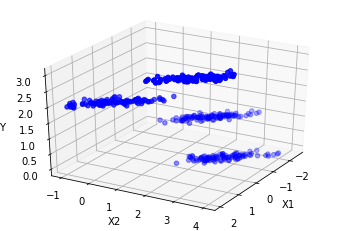

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['X1'].to_numpy(), data['X2'].to_numpy(), data['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 30)
plt.show()

In [53]:
data.describe()

,X1,X2,Y
count,400.000000,400.000000,400.000000
mean,-0.180275,1.790700,1.500000
std,1.089922,1.165162,1.119434
min,-2.468680,-0.995971,0.000000
25%,-1.174293,1.098780,0.750000
50%,-0.207917,2.122293,1.500000
75%,0.767063,2.649584,2.250000
max,1.967884,4.021044,3.000000


Дізнаємося, які класи присутні в даних

In [54]:
data['Y'].value_counts()

3    100
2    100
0    100
1    100
Name: Y, dtype: int64

Як бачимо, наш датасет збалансований

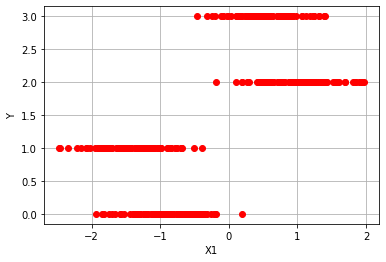

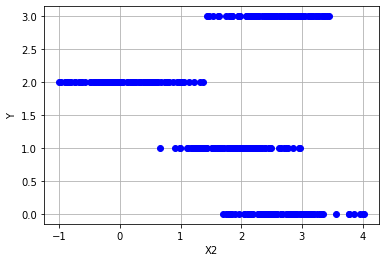

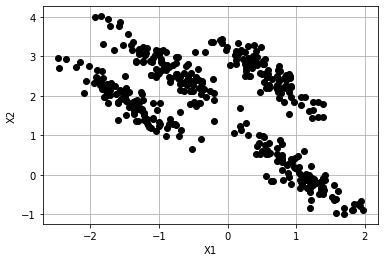

In [55]:
plt.plot(data.X1, data.Y, 'ro', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X2, data.Y, 'bo', label = 'X2, Y')
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X1, data.X2, 'ko', label = 'X1, X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [56]:
data.corr()

,X1,X2,Y
X1,1.000000,-0.588064,0.692763
X2,-0.588064,1.000000,-0.212406
Y,0.692763,-0.212406,1.000000


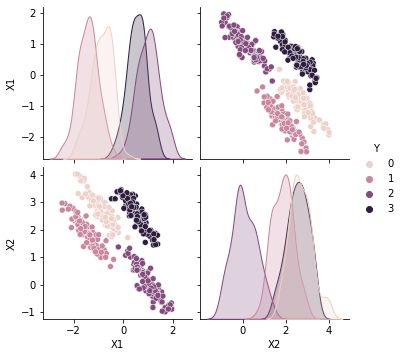

In [57]:
sns.pairplot(data=data, hue='Y')
plt.show()

# Split data into train and test

In [58]:
def split_data(X, y, fraction):
    split = np.random.rand(X.shape[0]) > fraction

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]

    return X_Train, y_Train, X_Test, y_Test

In [184]:
X_Train, y_Train, X_Test, y_Test = split_data(data[['X1', 'X2']], data['Y'], fraction = 0.1)

In [185]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((365, 2), (365,), (35, 2), (35,))

# Data Normalization

In [123]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [167]:
# X_Train = minmax_scaler.fit_transform(X_Train)
# X_Test = minmax_scaler.transform(X_Test)

# X_Train = standard_scaler.fit_transform(X_Train)
# X_Test = standard_scaler.transform(X_Test)

# Train Model

In [186]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,)
             ]
        }
       ]

In [187]:
clf = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_Train, y_Train)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (4,), 'solver': 'adam'}


In [188]:
params = {'activation': 'tanh', 'hidden_layer_sizes': (4,), 'solver': 'adam'}

In [190]:
model = MLPClassifier(max_iter=10000, **params)
model.fit(X_Train, y_Train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(4,), max_iter=10000)

# Predict

In [191]:
predictions = model.predict(X_Test)

In [192]:
pred_score = model.predict_proba(X_Test)

In [193]:
print(accuracy_score(y_Test, predictions))

1.0


In [194]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



# Cross-validation 

In [195]:
accuracy = cross_val_score(model, data[['X1', 'X2']], data['Y'], scoring='accuracy', cv = 10)
print(accuracy)

[0.975 0.95  1.    1.    1.    1.    1.    1.    1.    0.975]


In [196]:
print(accuracy.mean())

0.99


# Decision Boundary

In [197]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


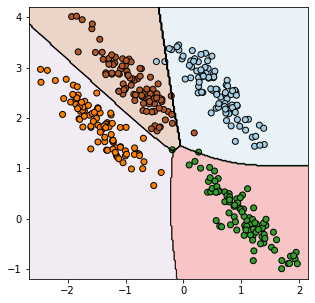

In [198]:
plot_decision_boundary(model, np.array(X_Train), np.array(y_Train))

# Evaluation

• confusion matrix

• precision

• recall

• F1 score

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

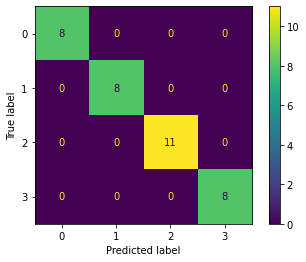

In [199]:
cm = confusion_matrix(y_Test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [200]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [206]:
roc_auc_score(y_Test, pred_score, multi_class = 'ovr', average = 'macro')

1.0